In [ ]:
import os
from aubio import source, onset

In [ ]:
def get_onset_times(file_path):
    window_size = 1024 # FFT size
    hop_size = window_size // 4

    sample_rate = 44100
    src_func = source(file_path, sample_rate, hop_size)
    sample_rate = src_func.samplerate
    onset_func = onset('default', window_size, hop_size)
    
    duration = float(src_func.duration) / src_func.samplerate

    onset_times = [] # seconds
    while True: # read frames
        samples, num_frames_read = src_func()
        if onset_func(samples):
            onset_time = onset_func.get_last_s()
            if onset_time < duration:
                onset_times.append(onset_time)
            else:
                break
        if num_frames_read < hop_size:
            break
    
    return onset_times

In [ ]:
path = './AirSolo_ImpP4Po441.wav'

In [ ]:
def main():
    file_path = path
    onset_times = get_onset_times(file_path)
    # remove extension, .mp3, .wav etc.
    file_name_no_extension, _ = os.path.splitext(file_path)
    output_name = file_name_no_extension + '.beatmap.txt'
    with open(output_name, 'wt') as f:
        f.write('\n'.join(['%.4f' % onset_time for onset_time in onset_times]))


In [ ]:
main()

In [ ]:
import sys
from aubio import source, onset

win_s = 1024                 # fft size
hop_s = win_s // 2          # hop size


filename = path
samplerate = 44100

s = source(filename, samplerate, hop_s)
#s = source(filename)
print(filename, samplerate, hop_s)
samplerate = s.samplerate

o = onset("default", win_s, hop_s, samplerate)

# list of onsets, in samples
onsets = []

# total number of frames read
total_frames = 0
while True:
    samples, read = s()
    
    if o(samples):
        print("%f" % o.get_last_s())
        onsets.append(o.get_last())
    total_frames += read
    if read < hop_s: break

In [ ]:
onsets

In [ ]:
import aubio

total_read = 0
with aubio.source(path) as src:
    for frames in src:
        total_read += samples.shape[-1]

In [ ]:
total_read

In [1]:
import librosa

In [191]:
path = './AirSolo_ImpP4Po441.wav'
y, sr = librosa.load(path, sr=None)
librosa.onset.onset_detect(y=y, sr=44100, units='time', backtrack=True)
o_env = librosa.onset.onset_strength(y=y, sr=sr)

times = librosa.times_like(o_env, sr=sr)

onset_frames = librosa.onset.onset_detect(onset_envelope=o_env, sr=sr, backtrack=True)

In [192]:
sr

44100

In [193]:
onset_frames

array([  2,  45,  90, 114, 258, 300, 327, 372, 423, 462, 492, 529, 607,
       633, 669, 695, 725, 752, 783, 866, 890])

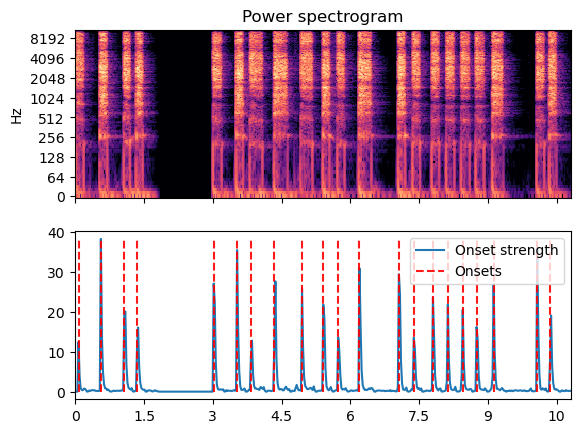

In [24]:
import matplotlib.pyplot as plt
from librosa.display import specshow
import numpy as np


D = np.abs(librosa.stft(y))

fig, ax = plt.subplots(nrows=2, sharex=True)

specshow(librosa.amplitude_to_db(D, ref=np.max),

                         x_axis='time', y_axis='log', ax=ax[0])

ax[0].set(title='Power spectrogram')

ax[0].label_outer()

ax[1].plot(times, o_env, label='Onset strength')

ax[1].vlines(times[onset_frames], 0, o_env.max(), color='r', alpha=0.9,

           linestyle='--', label='Onsets')

ax[1].legend()

In [194]:
librosa.frames_to_time(onset_frames)

array([ 0.04643991,  1.04489796,  2.08979592,  2.64707483,  5.9907483 ,
        6.96598639,  7.59292517,  8.63782313,  9.82204082, 10.72761905,
       11.42421769, 12.28335601, 14.09451247, 14.69823129, 15.53414966,
       16.13786848, 16.83446712, 17.4614059 , 18.18122449, 20.10848073,
       20.66575964])

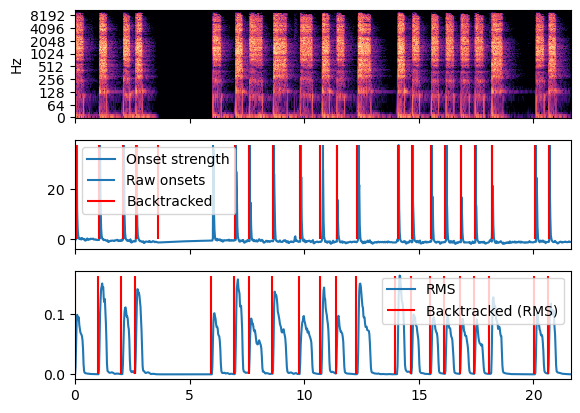

In [57]:
import matplotlib.pyplot as plt

y, sr = librosa.load(path, sr=None)

oenv = librosa.onset.onset_strength(y=y, sr=sr, detrend=True)

times = librosa.times_like(oenv)

# Detect events without backtracking

onset_raw = librosa.onset.onset_detect(onset_envelope=oenv,

                                       backtrack=False)


onset_bt = librosa.onset.onset_backtrack(onset_raw, oenv)

S = np.abs(librosa.stft(y=y))

rms = librosa.feature.rms(S=S)

onset_bt_rms = librosa.onset.onset_backtrack(onset_raw, rms[0])



fig, ax = plt.subplots(nrows=3, sharex=True)

specshow(librosa.amplitude_to_db(S, ref=np.max),

                         y_axis='log', x_axis='time', ax=ax[0])

ax[0].label_outer()

ax[1].plot(times, oenv, label='Onset strength')

ax[1].vlines(librosa.frames_to_time(onset_raw), 0, oenv.max(), label='Raw onsets')

ax[1].vlines(librosa.frames_to_time(onset_bt), 0, oenv.max(), label='Backtracked', color='r')

ax[1].legend()

ax[1].label_outer()

ax[2].plot(times, rms[0], label='RMS')

ax[2].vlines(librosa.frames_to_time(onset_bt_rms), 0, rms.max(), label='Backtracked (RMS)', color='r')

ax[2].legend()


In [200]:
zc = librosa.feature.zero_crossing_rate(y)

In [223]:
zc

array([[0.05078125, 0.11962891, 0.19970703, 0.23242188, 0.29638672,
        0.29980469, 0.2890625 , 0.29345703, 0.29296875, 0.2890625 ,
        0.29199219, 0.29296875, 0.28613281, 0.27783203, 0.27441406,
        0.21972656, 0.19824219, 0.18896484, 0.16699219, 0.18554688,
        0.18798828, 0.18652344, 0.19042969, 0.18310547, 0.16064453,
        0.14404297, 0.13476562, 0.13867188, 0.15722656, 0.17138672,
        0.17626953, 0.18408203, 0.18701172, 0.16503906, 0.15136719,
        0.11962891, 0.11132812, 0.11181641, 0.09033203, 0.07470703,
        0.05126953, 0.05419922, 0.05566406, 0.08398438, 0.09130859,
        0.10791016, 0.16357422, 0.21337891, 0.25634766, 0.27929688,
        0.29296875, 0.28662109, 0.28759766, 0.27929688, 0.26708984,
        0.26123047, 0.26367188, 0.25341797, 0.21826172, 0.18457031,
        0.14794922, 0.13330078, 0.13476562, 0.14794922, 0.14892578,
        0.13769531, 0.11914062, 0.08105469, 0.05078125, 0.03125   ,
        0.01953125, 0.01855469, 0.03710938, 0.06

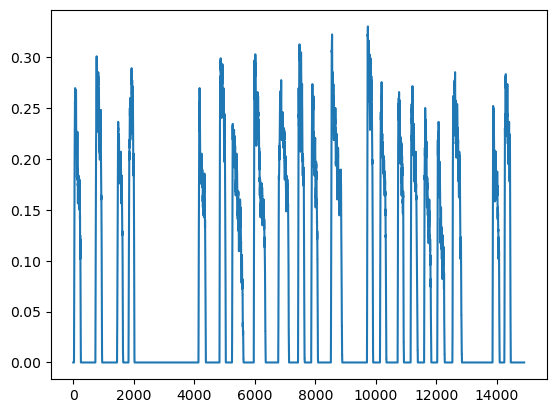

In [271]:
import matplotlib.pyplot as plt

y, sr = librosa.load(path, sr=None)
zc = librosa.feature.zero_crossing_rate(y + 0.1, frame_length=512, hop_length=32)

#onsets = librosa.onset.onset_detect(y=zc, sr=44100, units='time')

plt.plot(zc[0])

In [273]:
previous = 0
hop_length = 32
zc = librosa.feature.zero_crossing_rate(y + 0.1, frame_length=512, hop_length=hop_length)

for n,i in enumerate(zc[0]):
    if i > 0 and previous == 0:
        #print(librosa.frames_to_time(n),i)
        print(f"add_region('marka', {librosa.frames_to_time(n, sr=44100, hop_length=hop_length)}, typ=False)")
    previous = i

add_region('marka', 0.018140589569160998, typ=False)
add_region('marka', 0.531156462585034, typ=False)
add_region('marka', 1.0499773242630386, typ=False)
add_region('marka', 1.3249886621315192, typ=False)
add_region('marka', 3.0026303854875285, typ=False)
add_region('marka', 3.506938775510204, typ=False)
add_region('marka', 3.80734693877551, typ=False)
add_region('marka', 4.3290702947845805, typ=False)
add_region('marka', 4.915374149659864, typ=False)
add_region('marka', 5.390657596371882, typ=False)
add_region('marka', 5.706303854875284, typ=False)
add_region('marka', 6.17795918367347, typ=False)
add_region('marka', 7.0436281179138325, typ=False)
add_region('marka', 7.355646258503401, typ=False)
add_region('marka', 7.778684807256236, typ=False)
add_region('marka', 8.090702947845806, typ=False)
add_region('marka', 8.413605442176872, typ=False)
add_region('marka', 8.728526077097506, typ=False)
add_region('marka', 9.092063492063492, typ=False)
add_region('marka', 10.054965986394558, typ=

In [243]:
librosa.frames_to_time?

In [217]:
plt.plot?

In [215]:
librosa.frames_to_time(zc)[0]

array([1.17913832e-03, 2.76643991e-03, 4.62585034e-03, 5.39682540e-03,
       6.84807256e-03, 6.93877551e-03, 6.71201814e-03, 6.80272109e-03,
       6.80272109e-03, 6.71201814e-03, 6.75736961e-03, 6.80272109e-03,
       6.62131519e-03, 6.43990930e-03, 6.34920635e-03, 5.07936508e-03,
       4.58049887e-03, 4.35374150e-03, 3.85487528e-03, 4.30839002e-03,
       4.35374150e-03, 4.30839002e-03, 4.39909297e-03, 4.21768707e-03,
       3.71882086e-03, 3.31065760e-03, 3.12925170e-03, 3.21995465e-03,
       3.62811791e-03, 3.94557823e-03, 4.08163265e-03, 4.26303855e-03,
       4.30839002e-03, 3.80952381e-03, 3.49206349e-03, 2.76643991e-03,
       2.58503401e-03, 2.58503401e-03, 2.08616780e-03, 1.72335601e-03,
       1.17913832e-03, 1.22448980e-03, 1.26984127e-03, 1.95011338e-03,
       2.08616780e-03, 2.49433107e-03, 3.76417234e-03, 4.94331066e-03,
       5.94104308e-03, 6.48526077e-03, 6.80272109e-03, 6.62131519e-03,
       6.66666667e-03, 6.48526077e-03, 6.16780045e-03, 6.03174603e-03,
      

In [ ]:
ax[1].vlines(librosa.frames_to_time(zc), 0, oenv.max(), label='Raw onsets')

In [49]:
len(rms[0])

932

In [40]:
sr

44100

In [44]:
librosa.frames_to_time?

In [58]:
librosa.frames_to_time(onset_bt_rms, sr=sr)

array([ 0.        ,  0.49922902,  1.01006803,  1.30031746,  2.9721542 ,
        3.47138322,  3.78485261,  4.30730159,  4.88780045,  5.35219955,
        5.68888889,  6.13006803,  6.97759637,  7.33750567,  7.74385488,
        8.05732426,  8.39401361,  8.70748299,  9.03256236, 10.00780045,
       10.32126984])

In [196]:
for i in librosa.frames_to_time(onset_frames, sr=44100):
    print(f"add_region('marka', {i}, typ=False)")

add_region('marka', 0.023219954648526078, typ=False)
add_region('marka', 0.5224489795918368, typ=False)
add_region('marka', 1.0448979591836736, typ=False)
add_region('marka', 1.3235374149659864, typ=False)
add_region('marka', 2.995374149659864, typ=False)
add_region('marka', 3.4829931972789114, typ=False)
add_region('marka', 3.7964625850340137, typ=False)
add_region('marka', 4.31891156462585, typ=False)
add_region('marka', 4.911020408163266, typ=False)
add_region('marka', 5.363809523809524, typ=False)
add_region('marka', 5.712108843537415, typ=False)
add_region('marka', 6.141678004535147, typ=False)
add_region('marka', 7.047256235827664, typ=False)
add_region('marka', 7.349115646258503, typ=False)
add_region('marka', 7.767074829931973, typ=False)
add_region('marka', 8.068934240362811, typ=False)
add_region('marka', 8.417233560090702, typ=False)
add_region('marka', 8.730702947845804, typ=False)
add_region('marka', 9.09061224489796, typ=False)
add_region('marka', 10.054240362811791, typ=

In [35]:
sr

44100

[Text(0, 0.5, 'Normalized strength'), []]

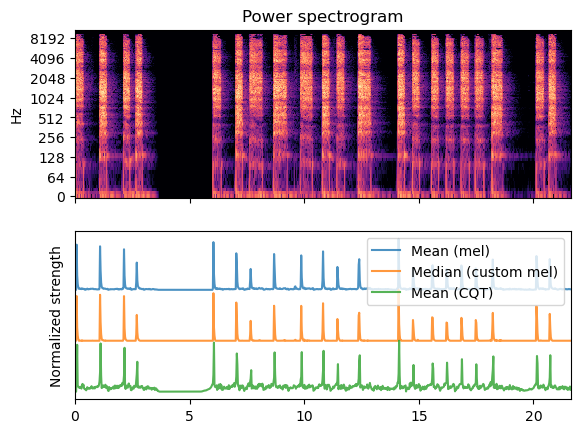

In [34]:
import matplotlib.pyplot as plt

y, sr = librosa.load(path, sr=None)
D = np.abs(librosa.stft(y))
times = librosa.times_like(D)
fig, ax = plt.subplots(nrows=2, sharex=True)
librosa.display.specshow(librosa.amplitude_to_db(D, ref=np.max),

                         y_axis='log', x_axis='time', ax=ax[0])

ax[0].set(title='Power spectrogram')
ax[0].label_outer()
onset_env = librosa.onset.onset_strength(y=y, sr=sr)
ax[1].plot(times, 2 + onset_env / onset_env.max(), alpha=0.8,
           label='Mean (mel)')

onset_env = librosa.onset.onset_strength(y=y, sr=sr,
                                         aggregate=np.median,
                                         fmax=8000, n_mels=128)
ax[1].plot(times, 1 + onset_env / onset_env.max(), alpha=0.8,
           label='Median (custom mel)')

C = np.abs(librosa.cqt(y=y, sr=sr))
onset_env = librosa.onset.onset_strength(sr=sr, S=librosa.amplitude_to_db(C, ref=np.max))
ax[1].plot(times, onset_env / onset_env.max(), alpha=0.8,
         label='Mean (CQT)')

ax[1].legend()
ax[1].set(ylabel='Normalized strength', yticks=[])

In [175]:
OnsetDetection?

In [101]:
from essentia.standard import *
from tempfile import TemporaryDirectory


# Load audio file.
audio = MonoLoader(filename=path)()

In [104]:
audio

array([ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00, ...,
        2.3841858e-07,  0.0000000e+00, -2.3841858e-07], dtype=float32)

In [181]:
# 1. Compute the onset detection function (ODF).

# The OnsetDetection algorithm provides various ODFs.
od_hfc = OnsetDetection(method='flux')
od_complex = OnsetDetection(method='complex')

# We need the auxilary algorithms to compute magnitude and phase.
w = Windowing(type='hamming')
fft = FFT() # Outputs a complex FFT vector.
c2p = CartesianToPolar() # Converts it into a pair of magnitude and phase vectors.

# Compute both ODF frame by frame. Store results to a Pool.
pool = essentia.Pool()
for frame in FrameGenerator(audio, frameSize=2048, hopSize=512):
    magnitude, phase = c2p(fft(w(frame)))
    pool.add('odf.flux', od_hfc(magnitude, phase))
    pool.add('odf.complex', od_complex(magnitude, phase))

# 2. Detect onset locations.
onsets = Onsets()

onsets_hfc = onsets(# This algorithm expects a matrix, not a vector.
                    essentia.array([pool['odf.flux']]),
                    # You need to specify weights, but if we use only one ODF
                    # it doesn't actually matter which weight to give it
                    [1])

onsets_complex = onsets(essentia.array([pool['odf.complex']]), [1])


# Add onset markers to the audio and save it to a file.
# We use beeps instead of white noise and stereo signal as it's more distinctive.

# We want to keep beeps in a separate audio channel.
# Add them to a silent audio and use the original audio as another channel. Mux both into a stereo signal.
# silence = [0.] * len(audio)

"""
beeps_hfc = AudioOnsetsMarker(onsets=onsets_hfc, type='beep')(silence)
beeps_complex = AudioOnsetsMarker(onsets=onsets_complex, type='beep')(silence)

audio_hfc = StereoMuxer()(audio, beeps_hfc)
audio_complex = StereoMuxer()(audio, beeps_complex)

# Write audio to files in a temporary directory.
temp_dir = TemporaryDirectory()
AudioWriter(filename=temp_dir.name + '/hiphop_onsets_hfc_stereo.mp3', format='mp3')(audio_hfc)
AudioWriter(filename=temp_dir.name + '/hiphop_onsets_complex_stereo.mp3', format='mp3')(audio_complex)"""

"\nbeeps_hfc = AudioOnsetsMarker(onsets=onsets_hfc, type='beep')(silence)\nbeeps_complex = AudioOnsetsMarker(onsets=onsets_complex, type='beep')(silence)\n\naudio_hfc = StereoMuxer()(audio, beeps_hfc)\naudio_complex = StereoMuxer()(audio, beeps_complex)\n\n# Write audio to files in a temporary directory.\ntemp_dir = TemporaryDirectory()\nAudioWriter(filename=temp_dir.name + '/hiphop_onsets_hfc_stereo.mp3', format='mp3')(audio_hfc)\nAudioWriter(filename=temp_dir.name + '/hiphop_onsets_complex_stereo.mp3', format='mp3')(audio_complex)"

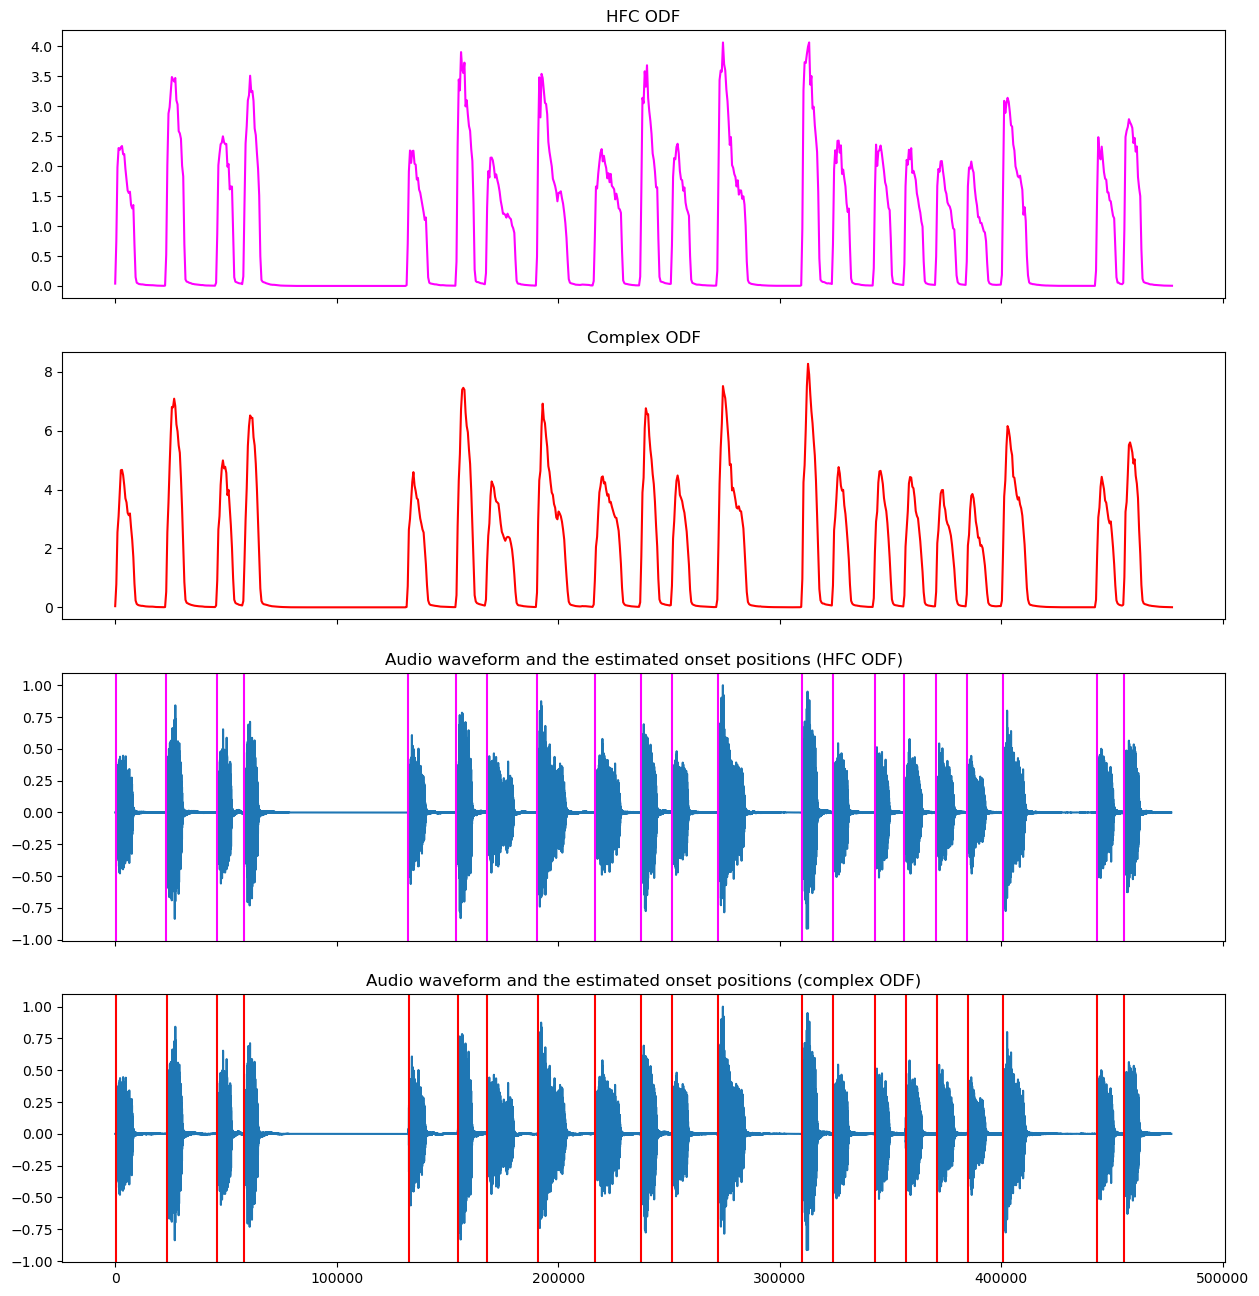

In [182]:
import matplotlib.pyplot as plt
%matplotlib inline

import numpy
n_frames = len(pool['odf.flux'])
frames_position_samples = numpy.arange(n_frames) * 512

fig, ((ax1, ax2, ax3, ax4)) = plt.subplots(4, 1, sharex=True, sharey=False, figsize=(15, 16))

ax1.set_title('HFC ODF')
ax1.plot(frames_position_samples, pool['odf.flux'], color='magenta')

ax2.set_title('Complex ODF')
ax2.plot(frames_position_samples, pool['odf.complex'], color='red')

ax3.set_title('Audio waveform and the estimated onset positions (HFC ODF)')
ax3.plot(audio)
for onset in onsets_hfc:
    ax3.axvline(x=onset*44100, color='magenta')

ax4.set_title('Audio waveform and the estimated onset positions (complex ODF)')
ax4.plot(audio)
for onset in onsets_complex:
    ax4.axvline(x=onset*44100, color='red')

In [163]:
onsets_hfc

array([ 0.03482993,  0.5340589 ,  1.056508  ,  1.3351474 ,  3.018594  ,
        3.5178232 ,  3.8196826 ,  4.3421316 ,  4.9342403 ,  5.3986397 ,
        5.7237186 ,  6.188118  ,  7.0472565 ,  7.3723354 ,  7.7902946 ,
        8.103765  ,  8.4288435 ,  8.742313  ,  9.102222  , 10.06585   ,
       10.34449   ], dtype=float32)

In [90]:
onsets_complex

array([0.01160998, 0.13931973, 0.26702946, 0.3599093 , 0.7546485 ,
       0.88235825, 0.998458  , 1.0913379 , 1.2422676 , 1.3699774 ,
       1.4628571 , 1.555737  , 1.7647165 , 1.8808163 , 1.9620862 ,
       2.054966  , 2.1362357 , 2.2175057 , 2.2871656 , 2.519365  ,
       2.6122448 ], dtype=float32)

In [92]:
old = np.array([ 0.02321995,  0.5340589 ,  1.056508  ,  1.3351474 ,  3.0069842 ,
        3.5178232 ,  3.8196826 ,  4.3305216 ,  4.9226303 ,  5.3986397 ,
        5.7121086 ,  6.188118  ,  7.0472565 ,  7.3607254 ,  7.7902946 ,
        8.0921545 ,  8.417233  ,  8.730703  ,  9.102222  , 10.06585   ,
       10.34449   ])

In [94]:
old / onsets_complex

array([1.99999964, 3.83333279, 3.95652219, 3.70967745, 3.98461558,
       3.98684229, 3.82558154, 3.96808498, 3.96261664, 3.94067806,
       3.90476178, 3.97761185, 3.99342131, 3.9135801 , 3.97041404,
       3.93785328, 3.94021734, 3.93717275, 3.97969514, 3.99539158,
       3.96000016])

In [183]:
for i in onsets_hfc:
    print(f"add_region('marka', {i}, typ=False)")

add_region('marka', 0.01160997711122036, typ=False)
add_region('marka', 0.5224489569664001, typ=False)
add_region('marka', 1.0448979139328003, typ=False)
add_region('marka', 1.3235374689102173, typ=False)
add_region('marka', 2.9953742027282715, typ=False)
add_region('marka', 3.494603157043457, typ=False)
add_region('marka', 3.808072566986084, typ=False)
add_region('marka', 4.318911552429199, typ=False)
add_region('marka', 4.911020278930664, typ=False)
add_region('marka', 5.387029647827148, typ=False)
add_region('marka', 5.700499057769775, typ=False)
add_region('marka', 6.176507949829102, typ=False)
add_region('marka', 7.035646438598633, typ=False)
add_region('marka', 7.34911584854126, typ=False)
add_region('marka', 7.778684616088867, typ=False)
add_region('marka', 8.080544471740723, typ=False)
add_region('marka', 8.405623435974121, typ=False)
add_region('marka', 8.719093322753906, typ=False)
add_region('marka', 9.090612411499023, typ=False)
add_region('marka', 10.054240226745605, typ=F

In [64]:
for i in onsets_complex:
    print(f"add_region('marka', {i}, typ=False)")

add_region('marka', 0.02321995422244072, typ=False)
add_region('marka', 0.5340589284896851, typ=False)
add_region('marka', 1.05650794506073, typ=False)
add_region('marka', 1.3351473808288574, typ=False)
add_region('marka', 3.006984233856201, typ=False)
add_region('marka', 3.5178232192993164, typ=False)
add_region('marka', 3.8196825981140137, typ=False)
add_region('marka', 4.330521583557129, typ=False)
add_region('marka', 4.922630310058594, typ=False)
add_region('marka', 5.398639678955078, typ=False)
add_region('marka', 5.712108612060547, typ=False)
add_region('marka', 6.188117980957031, typ=False)
add_region('marka', 7.0472564697265625, typ=False)
add_region('marka', 7.360725402832031, typ=False)
add_region('marka', 7.790294647216797, typ=False)
add_region('marka', 8.092154502868652, typ=False)
add_region('marka', 8.41723346710205, typ=False)
add_region('marka', 8.730703353881836, typ=False)
add_region('marka', 9.102222442626953, typ=False)
add_region('marka', 10.065850257873535, typ=F